In [2]:
import numpy as np
import matplotlib.pyplot as plt

1. Macierz przejść łańcucha

In [3]:
P = np.array([
    [0.64, 0.32, 0.04],
    [0.40, 0.50, 0.10],
    [0.25, 0.50, 0.25]
])

print("Macierz przejść P:")
print(P)

Macierz przejść P:
[[0.64 0.32 0.04]
 [0.4  0.5  0.1 ]
 [0.25 0.5  0.25]]


2. Rozkład stacjonarny Pi

Pi * P = Pi  oraz  sum(Pi)=1

In [4]:
# Transponujemy, aby rozwiązywać (P^T - I)^T * Pi = 0
A = P.T - np.eye(3)
A = np.vstack((A, np.ones(3)))   # równanie sum(Pi)=1
b = np.array([0, 0, 0, 1])

Pi = np.linalg.lstsq(A, b, rcond=None)[0]

print("\nRozkład stacjonarny Pi:")
print(Pi)


Rozkład stacjonarny Pi:
[0.51020408 0.40816327 0.08163265]


3. Potęgi P^N i zbieżność

In [5]:
def convergence_check(P, eps=1e-3, max_iter=200):
    PN_prev = np.eye(P.shape[0])
    for N in range(1, max_iter+1):
        PN = PN_prev @ P
        diff = np.max(np.abs(PN - PN_prev))
        if diff < eps:
            return N, PN
        PN_prev = PN
    return None, PN_prev

eps = 1e-6
N_conv, P_limit = convergence_check(P, eps)

print(f"\nZbieżność osiągnięta dla N = {N_conv} (|P^N - P^(N-1)| < {eps})")
print("P^N ~:")
print(P_limit)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Zbieżność osiągnięta dla N = 13 (|P^N - P^(N-1)| < 1e-06)
P^N ~:
[[0.51020415 0.40816323 0.08163263]
 [0.51020403 0.40816329 0.08163267]
 [0.51020392 0.40816336 0.08163272]]


4. Wykres zbieżności P^N

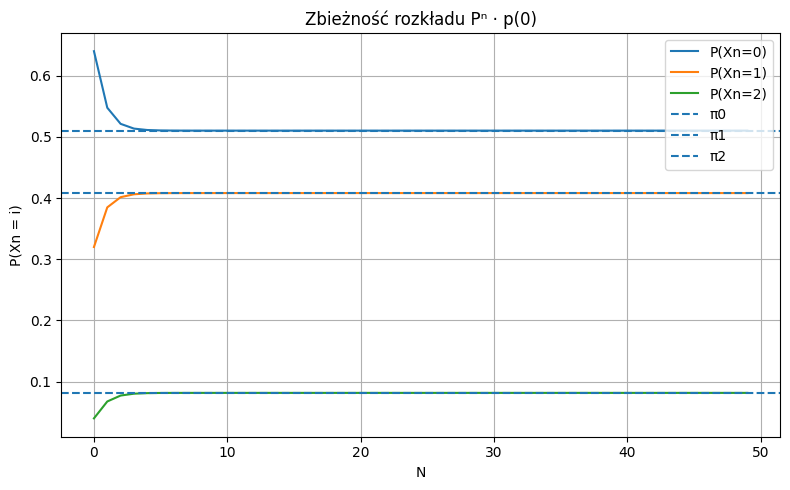

In [7]:
num_iter = 50
p0 = np.array([1, 0, 0])   # start w stanie 0

p_values = []

PN = np.eye(3)
for i in range(1, num_iter+1):
    PN = PN @ P
    p_values.append((p0 @ PN).tolist())

p_values = np.array(p_values)

plt.figure(figsize=(8,5))
plt.plot(p_values[:,0], label="P(Xn=0)")
plt.plot(p_values[:,1], label="P(Xn=1)")
plt.plot(p_values[:,2], label="P(Xn=2)")

plt.axhline(Pi[0], linestyle='--', label="π0")
plt.axhline(Pi[1], linestyle='--', label="π1")
plt.axhline(Pi[2], linestyle='--', label="π2")

plt.title("Zbieżność rozkładu Pⁿ · p(0)")
plt.xlabel("N")
plt.ylabel("P(Xn = i)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
